In [24]:
#1D text-speech
#2D images
#3D video for cnn

In [25]:
#Importing required libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [26]:
#Dataset
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [27]:
# print the number of samples
print(f"X_train: > {len(X_train)} <")
print(f"X_test: >{len(X_test)} <")

X_train: > 50000 <
X_test: >10000 <


In [28]:
#print a sample from X_test datasets
print(X_test[1258])

[[[ 92  80  71]
  [ 90  81  74]
  [ 90  84  79]
  ...
  [ 88  77  57]
  [ 97  82  71]
  [108  90  79]]

 [[ 86  74  65]
  [ 85  76  69]
  [ 86  81  76]
  ...
  [ 95  80  55]
  [ 86  71  57]
  [ 86  72  62]]

 [[ 72  60  51]
  [ 61  52  45]
  [ 60  54  49]
  ...
  [117  99  69]
  [ 89  74  58]
  [ 86  75  66]]

 ...

 [[149 131 115]
  [140 126 109]
  [134 124 106]
  ...
  [164 147 135]
  [180 157 137]
  [183 162 137]]

 [[153 136 117]
  [143 130 110]
  [133 123 102]
  ...
  [189 170 154]
  [190 167 143]
  [190 169 141]]

 [[162 144 122]
  [156 138 116]
  [155 138 116]
  ...
  [198 179 154]
  [198 177 151]
  [195 174 147]]]


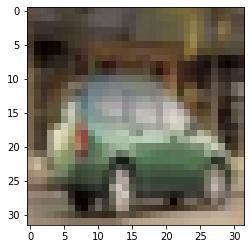

(32, 32, 3)


In [29]:
plt.imshow(X_test[1258])
plt.show()

print(X_test[1258].shape)

In [30]:
#preprocessing
#create the validation datasets
#and assign the last 10000 images of X_train and y_train
X_val=X_train[40000:]
y_val =y_train[40000:]

#create new train datasets
#and assign the first 4000 images of X_train and  y_train

X_train =X_train[:40000]
y_train=y_train[:40000]

In [31]:
#print the lengths of each dataset
print(f"X_train: {len(X_train)}")
print(f"X_val: {len(X_val)}")
print(f"X_test: {len(X_test)}")


X_train: 40000
X_val: 10000
X_test: 10000


In [32]:
#Normalization
X_train=X_train/255
X_val=X_val/255
X_test=X_test/255

In [47]:
#Create a model object
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu",input_shape=(32,32,3)),
    tf.keras.layers.MaxPool2D((2,2)),

    #add more conv and maxpooling layers

    tf.keras.layers.Conv2D(64,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)), 

    tf.keras.layers.Conv2D(64,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu"),
    #tf.keras.layers.MaxPooling2D((2,2)),

    #flatten
    tf.keras.layers.Flatten(),

    #add the dense layer and dropout layer
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dropout(0.5),

    #add thedense layer and dropout layer
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dropout(0.5),
    
    #add the output layer
    tf.keras.layers.Dense(10,activation="softmax")
])

In [48]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [49]:
#training model for 50 epocs
results=model.fit(X_train,y_train,
                  batch_size=128,
                  epochs=50,
                  validation_data=(X_val,y_val))

Epoch 1/50
313/313 [==============================] - 3s 8ms/step - loss: 2.0644 - accuracy: 0.2082 - val_loss: 1.6907 - val_accuracy: 0.3768
Epoch 2/50
313/313 [==============================] - 2s 7ms/step - loss: 1.7083 - accuracy: 0.3517 - val_loss: 1.4391 - val_accuracy: 0.4829
Epoch 3/50
313/313 [==============================] - 2s 7ms/step - loss: 1.5455 - accuracy: 0.4257 - val_loss: 1.3046 - val_accuracy: 0.5391
Epoch 4/50
313/313 [==============================] - 3s 9ms/step - loss: 1.4442 - accuracy: 0.4684 - val_loss: 1.2102 - val_accuracy: 0.5659
Epoch 5/50
313/313 [==============================] - 2s 7ms/step - loss: 1.3633 - accuracy: 0.5012 - val_loss: 1.1688 - val_accuracy: 0.5959
Epoch 6/50
313/313 [==============================] - 2s 7ms/step - loss: 1.3044 - accuracy: 0.5262 - val_loss: 1.1964 - val_accuracy: 0.5819
Epoch 7/50
313/313 [==============================] - 2s 7ms/step - loss: 1.2465 - accuracy: 0.5530 - val_loss: 1.0657 - val_accuracy: 0.6338
Epoch 

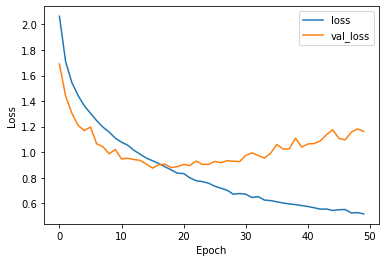

In [53]:
#visualize the results
#plot the training loss
plt.plot(results.history["loss"],label="loss")

#plot the the validation loss
plt.plot(results.history["val_loss"],label="val_loss")

#name the x an y axises
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend()
plt.show()

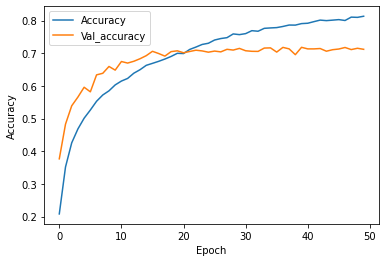

In [60]:
#plot the accuracy
plt.plot(results.history["accuracy"],label="Accuracy")

plt.plot(results.history["val_accuracy"],label="Val_accuracy")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

In [61]:
#performnace evalutaion
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.2171 - accuracy: 0.7042


[1.2171285152435303, 0.704200029373169]

In [64]:
#try a prediction
#make a prediction on the reshaped sample
prediction_result=model.predict(X_test[789].reshape(1,32,32,3))

prediction_result

array([[1.3224795e-08, 2.8963117e-12, 4.4826200e-19, 1.3029794e-20,
        1.0416742e-29, 4.5519495e-24, 1.5463217e-22, 3.2778657e-27,
        1.0000000e+00, 5.3977737e-13]], dtype=float32)

In [65]:

predicted_class=prediction_result.argmax()

predicted_probability =prediction_result.max()

In [66]:
print(f"This image belongs to class {predicted_class} with {predicted_probability} probability %")

This image belongs to class 8 with 1.0 probability %
